## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [5]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [6]:
train, test = keras.datasets.cifar10.load_data()

In [7]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [8]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [9]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [10]:
## 超參數設定
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.90

In [11]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


W1021 16:27:47.599798  1828 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:95: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.

W1021 16:27:47.600797  1828 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:98: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W1021 16:27:47.977502  1828 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:102: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1021 16:27:47.980498  1828 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1021 16:27:48.006481  1828 

Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


W1021 16:27:48.308218  1828 deprecation.py:323] From C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 9s 186us/step - loss: 2.1419 - acc: 0.2043 - val_loss: 1.9760 - val_acc: 0.2657
Epoch 2/50
50000/50000 [==============================] - 8s 169us/step - loss: 1.8774 - acc: 0.3070 - val_loss: 2.1214 - val_acc: 0.2464
Epoch 3/50
50000/50000 [==============================] - 9s 179us/step - loss: 1.7989 - acc: 0.3479 - val_loss: 1.8375 - val_acc: 0.3395
Epoch 4/50
50000/50000 [==============================] - 10s 204us/step - loss: 1.7132 - acc: 0.3814 - val_loss: 1.7074 - val_acc: 0.3879
Epoch 5/50
50000/50000 [==============================] - 12s 240us/step - loss: 1.6581 - acc: 0.4025 - val_loss: 1.6832 - val_acc: 0.4016
Epoch 6/50
50000/50000 [==============================] - 11s 211us/step - loss: 1.6165 - acc: 0.4187 - val_loss: 1.6432 - val_acc: 0.4073
Epoch 7/50
50000/50000 [==============================] - 11s 230us/step - loss: 1.5733 - acc: 0.4344 - val_loss: 1.644

50000/50000 [==============================] - 10s 192us/step - loss: 1.8689 - acc: 0.3353 - val_loss: 1.8406 - val_acc: 0.3555
Epoch 2/50
50000/50000 [==============================] - 10s 193us/step - loss: 1.6521 - acc: 0.4137 - val_loss: 1.6146 - val_acc: 0.4264
Epoch 3/50
50000/50000 [==============================] - 9s 190us/step - loss: 1.5646 - acc: 0.4429 - val_loss: 1.5918 - val_acc: 0.4244
Epoch 4/50
50000/50000 [==============================] - 9s 188us/step - loss: 1.5000 - acc: 0.4712 - val_loss: 1.4943 - val_acc: 0.4673
Epoch 5/50
50000/50000 [==============================] - 9s 186us/step - loss: 1.4500 - acc: 0.4847 - val_loss: 1.5059 - val_acc: 0.4696
Epoch 6/50
50000/50000 [==============================] - 10s 201us/step - loss: 1.4134 - acc: 0.5000 - val_loss: 1.4907 - val_acc: 0.4588
Epoch 7/50
50000/50000 [==============================] - 9s 188us/step - loss: 1.3687 - acc: 0.5139 - val_loss: 1.4536 - val_acc: 0.4866
Epoch 8/50
50000/50000 [==================

50000/50000 [==============================] - 9s 187us/step - loss: 1.8788 - acc: 0.3399 - val_loss: 1.8369 - val_acc: 0.3495
Epoch 3/50
50000/50000 [==============================] - 9s 186us/step - loss: 1.8051 - acc: 0.3670 - val_loss: 1.7868 - val_acc: 0.3695
Epoch 4/50
50000/50000 [==============================] - 9s 187us/step - loss: 1.7571 - acc: 0.3833 - val_loss: 1.7403 - val_acc: 0.3888
Epoch 5/50
50000/50000 [==============================] - 10s 191us/step - loss: 1.7190 - acc: 0.3974 - val_loss: 1.7051 - val_acc: 0.4022
Epoch 6/50
50000/50000 [==============================] - 10s 192us/step - loss: 1.6864 - acc: 0.4090 - val_loss: 1.6746 - val_acc: 0.4105
Epoch 7/50
50000/50000 [==============================] - 9s 187us/step - loss: 1.6572 - acc: 0.4196 - val_loss: 1.6478 - val_acc: 0.4236
Epoch 8/50
50000/50000 [==============================] - 9s 185us/step - loss: 1.6294 - acc: 0.4309 - val_loss: 1.6276 - val_acc: 0.4302
Epoch 9/50
50000/50000 [===================

50000/50000 [==============================] - 11s 225us/step - loss: 2.1226 - acc: 0.2533 - val_loss: 2.0959 - val_acc: 0.2701
Epoch 4/50
50000/50000 [==============================] - 11s 228us/step - loss: 2.0743 - acc: 0.2763 - val_loss: 2.0543 - val_acc: 0.2823
Epoch 5/50
50000/50000 [==============================] - 13s 261us/step - loss: 2.0361 - acc: 0.2880 - val_loss: 2.0201 - val_acc: 0.2979
Epoch 6/50
50000/50000 [==============================] - 13s 263us/step - loss: 2.0048 - acc: 0.2999 - val_loss: 1.9913 - val_acc: 0.3076
Epoch 7/50
50000/50000 [==============================] - 13s 259us/step - loss: 1.9786 - acc: 0.3082 - val_loss: 1.9674 - val_acc: 0.3142
Epoch 8/50
50000/50000 [==============================] - 13s 260us/step - loss: 1.9564 - acc: 0.3169 - val_loss: 1.9476 - val_acc: 0.3212
Epoch 9/50
50000/50000 [==============================] - 11s 225us/step - loss: 1.9377 - acc: 0.3232 - val_loss: 1.9305 - val_acc: 0.3270
Epoch 10/50
50000/50000 [=============

Epoch 4/50
50000/50000 [==============================] - 13s 251us/step - loss: 2.2838 - acc: 0.1220 - val_loss: 2.2779 - val_acc: 0.1337
Epoch 5/50
50000/50000 [==============================] - 14s 273us/step - loss: 2.2724 - acc: 0.1451 - val_loss: 2.2673 - val_acc: 0.1536
Epoch 6/50
50000/50000 [==============================] - 10s 201us/step - loss: 2.2623 - acc: 0.1656 - val_loss: 2.2577 - val_acc: 0.1703
Epoch 7/50
50000/50000 [==============================] - 13s 261us/step - loss: 2.2531 - acc: 0.1802 - val_loss: 2.2489 - val_acc: 0.1822
Epoch 8/50
50000/50000 [==============================] - 14s 280us/step - loss: 2.2446 - acc: 0.1895 - val_loss: 2.2409 - val_acc: 0.1928
Epoch 9/50
50000/50000 [==============================] - 10s 210us/step - loss: 2.2366 - acc: 0.1979 - val_loss: 2.2333 - val_acc: 0.1993
Epoch 10/50
50000/50000 [==============================] - 11s 222us/step - loss: 2.2291 - acc: 0.2036 - val_loss: 2.2260 - val_acc: 0.2042ss: 2.2293 - acc: 0.20
Epoc

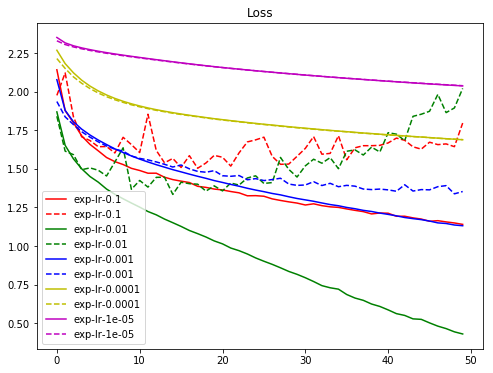

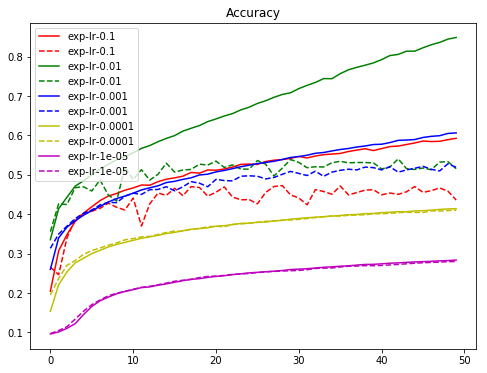

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()